In [ ]:
#importing keras ,np,plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Constants
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 25
TRAIN_DATA_DIR = './FER2013/train'
VALIDATION_DATA_DIR = './FER2013/test'
CLASS_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

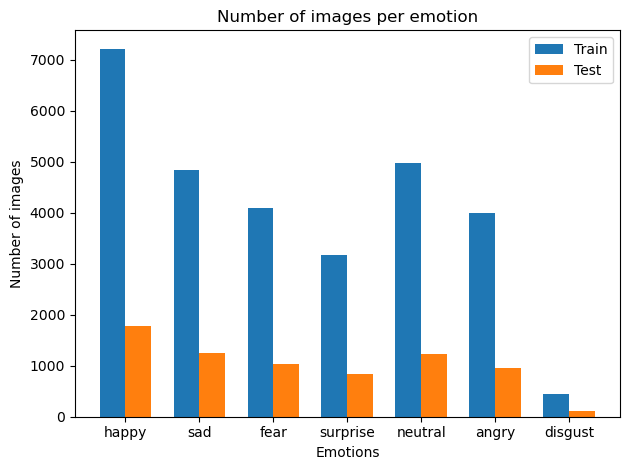

In [7]:
# Count data size
import os
import matplotlib.pyplot as plt

# Define directories
train_dir = './FER2013/train'
test_dir = './FER2013/test'

# Initialize dictionaries to hold the count of images per label
train_counts = {}
test_counts = {}

# Loop through each directory and count the number of files (images)
for category in os.listdir(train_dir):
    path = os.path.join(train_dir, category)
    if os.path.isdir(path):
        train_counts[category] = len(os.listdir(path))

for category in os.listdir(test_dir):
    path = os.path.join(test_dir, category)
    if os.path.isdir(path):
        test_counts[category] = len(os.listdir(path))

# Plotting
labels = list(train_counts.keys())
train_values = list(train_counts.values())
test_values = list(test_counts.values())

x = range(len(labels))  # the label locations

fig, ax = plt.subplots()
bar_width = 0.35  # the width of the bars

rects1 = ax.bar(x, train_values, bar_width, label='Train')
rects2 = ax.bar([p + bar_width for p in x], test_values, bar_width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Emotions')
ax.set_ylabel('Number of images')
ax.set_title('Number of images per emotion')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


In [ ]:
# Model creation
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Constants
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 25
TRAIN_DATA_DIR = './FER2013/train'
VALIDATION_DATA_DIR = './FER2013/test'
CLASS_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Datagenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    color_mode='grayscale',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)



# Define the model architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=['accuracy'])

# Model training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
callbacks_list = [early_stopping]
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // BATCH_SIZE,
                    callbacks=callbacks_list
                    )

# Saving the model
model.save('emotion_detection_model_v2.h5')

In [ ]:
# Loading the model
my_model = load_model('emotion_detection_model_v1.h5')

# Displaying a sample of test images with predicted labels
test_img, test_lbl = validation_generator.__next__()
predictions = my_model.predict(test_img)
print("Number of trainable parameters:", model.count_params())
for i in range(test_img.shape[0]):
    orig_label = CLASS_LABELS[np.argmax(test_lbl[i])]
    pred_label = CLASS_LABELS[np.argmax(predictions[i])]
    
    if orig_label == pred_label:
        image = test_img[i]
        plt.imshow(image[:,:,0], cmap='gray')
        plt.title("Original label: " + orig_label + ", Predicted label: " + pred_label)
        plt.show()
        break 

model.summary()

# Ploting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Printing the number of trainable parameters in the model
print("Number of trainable parameters:", model.count_params())
#tp-150399
#acc-0.52-25 epoch

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('./FER2013/test/angry/PrivateTest_10131363.jpg')

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Expand the dimensions to fit the model input
image_gray = np.expand_dims(image_gray, axis=0)
image_gray = np.expand_dims(image_gray, axis=3)  # Add an extra dimension for the channel

# Predict
pred = model.predict(image_gray)
pred

In [ ]:
# Real-time test with camera
import cv2
import numpy as np
from keras.models import load_model

# Load the emotion detection model
model = load_model('emotion_detection_model_v1.h5')
CLASS_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Load the face cascade
face_cascade = cv2.CascadeClassifier(r'/Users/camelot/tensorflow-test/opencv-4.x/data/haarcascades/haarcascade_frontalface_default.xml')

# To capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face and predict emotion
    for (x, y, w, h) in faces:
        # Extract face region from grayscale image
        face_region = gray[y:y+h, x:x+w]

        # Resize face region to the input size expected by the model
        face_region_resized = cv2.resize(face_region, (IMG_WIDTH, IMG_HEIGHT))
    
        # Expand dimensions to fit model input shape
        face_region_resized = np.expand_dims(face_region_resized, axis=0)
        face_region_resized = np.expand_dims(face_region_resized, axis=3)

        # Predict emotion
        pred = model.predict(face_region_resized)
        emotion = CLASS_LABELS[np.argmax(pred)]

        # Draw rectangle around the face and put label
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display
    cv2.imshow('Emotion Detection', img)

    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()